<a href="https://colab.research.google.com/github/msiplab/EicEngLabIV/blob/master/example02_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験Ⅳ－２　時系列データの可視化

新潟大学工学部工学科　電子情報通信プログラム 

## 準備

In [1]:
!pip install japanize-matplotlib
%matplotlib inline

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


In [2]:
import wave
import requests
from io import BytesIO

url = 'https://github.com/msiplab/EicEngLabIV/blob/develop/data/fannoise.wav?raw=true'
response = requests.get(url)
wf = wave.open(BytesIO(response.content),mode='rb')
buf = wf.readframes(-1)
fs  = wf.getframerate()
nf  = wf.getnframes()
y   = np.frombuffer(buf, dtype='int16')


## 時系列をプロット

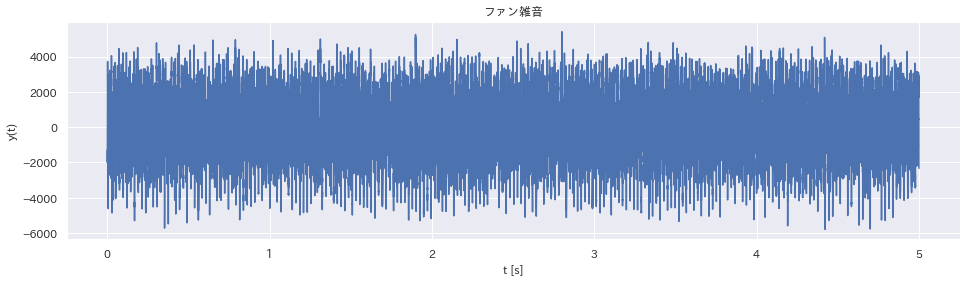

In [3]:
fig, ax = plt.subplots(figsize=(16,4))
t = np.linspace(0,nf/fs,nf)
ax.plot(t,y)
ax.set_title("ファン雑音")
ax.set_xlabel("t [s]")
ax.set_ylabel("y(t)")
ax.grid(True)
plt.show()

## ヒストグラムをプロット

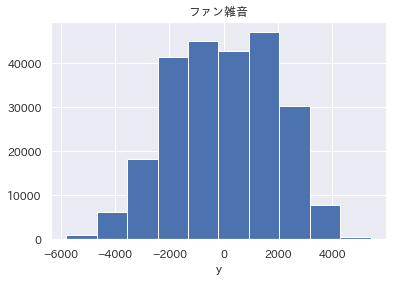

In [4]:
fig, ax = plt.subplots()
plt.hist(y)
ax.set_title("ファン雑音")
ax.set_xlabel("y")
ax.grid(True)
plt.show()

## 2点ごとの散布図をプロット

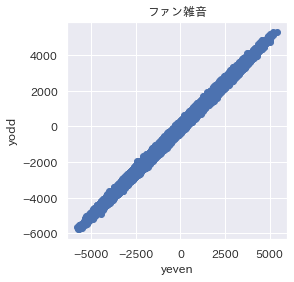

In [10]:
fig, ax = plt.subplots()
plt.scatter(y[0::2],y[1::2]) # 偶数番目データと奇数番目データに分割
ax.set_title("ファン雑音")
ax.set_xlabel("yeven")
ax.set_ylabel("yodd")
ax.grid(True)
ax.set_aspect('equal') # アスペクト比を1:1に調整
plt.show()